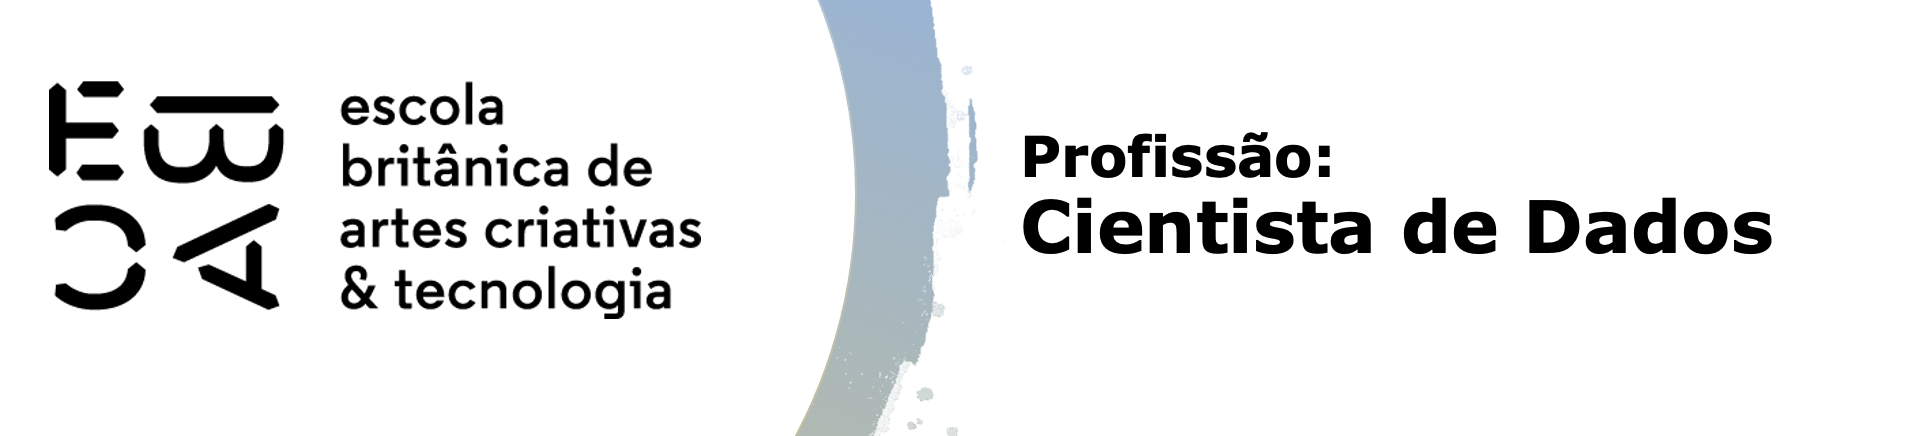

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [28]:
X_train = pd.read_csv('./Atividade 1/UCI HAR Dataset/train/X_train.txt',
                     sep=r'\s+', header=None)
X_test = pd.read_csv('./Atividade 1/UCI HAR Dataset/test/X_test.txt',
                    sep=r'\s+', header=None)

y_train = pd.read_csv('./Atividade 1/UCI HAR Dataset/train/y_train.txt',
                      sep=r'\s+',
                      header=None)
y_test = pd.read_csv('./Atividade 1/UCI HAR Dataset/test/y_test.txt',
                      sep=r'\s+',
                      header=None)

X_train.columns = range(X_train.shape[1])
X_test.columns = range(X_test.shape[1])

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [30]:
# Somente em Jupyter Notebook
# %%time
# Garante que y esteja em formato de vetor
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Etapa 1: Obter ccp_alphas
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=2360873)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities


ccp_alphas = ccp_alphas[::5]

# Etapa 2: Treinar modelos com cada alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf_loop = DecisionTreeClassifier(
        min_samples_leaf=20,
        random_state=2360873,
        ccp_alpha=ccp_alpha
    ).fit(X_train, y_train)
    clfs.append(clf_loop)

# Etapa 3: Pegar a última árvore (completa) para calcular importâncias
clf_final = clfs[-1]

# Etapa 4: Identificar as 3 variáveis mais importantes
importante = pd.Series(clf_final.feature_importances_, index=X_train.columns)
importante_ordenado = importante.sort_values(ascending=False)
top_3 = importante_ordenado.head(3)
print(top_3)

# Etapa 5: Selecionar colunas
var_top3 = top_3.index.tolist()
X_train_top3 = X_train[var_top3]
X_test_top3 = X_test[var_top3]

#Se quiser, posso te mostrar como plotar a relação entre ccp_alpha e a acurácia no conjunto de teste para ajudar na escolha do modelo ideal. Deseja isso?



52     0.402235
265    0.361435
559    0.236329
dtype: float64


In [31]:
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X=X_train_top3, y=y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [33]:
# garantindo que os ccp_alphas são únicos e positivos

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [36]:
# Transformando os ccp_alphas em dicionário.

grid_parametros = {'ccp_alpha': ccp_alphas}

In [37]:
# Rodando o GridSearchCV() para identificar os melhores parametros.

grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_top3, y_train)

Fitting 10 folds for each of 106 candidates, totalling 1060 fits
[CV 1/10; 1/106] START ccp_alpha=0.0............................................
[CV 1/10; 1/106] END .............ccp_alpha=0.0;, score=0.753 total time=   0.0s
[CV 2/10; 1/106] START ccp_alpha=0.0............................................
[CV 2/10; 1/106] END .............ccp_alpha=0.0;, score=0.740 total time=   0.0s
[CV 3/10; 1/106] START ccp_alpha=0.0............................................
[CV 3/10; 1/106] END .............ccp_alpha=0.0;, score=0.804 total time=   0.0s
[CV 4/10; 1/106] START ccp_alpha=0.0............................................
[CV 4/10; 1/106] END .............ccp_alpha=0.0;, score=0.717 total time=   0.0s
[CV 5/10; 1/106] START ccp_alpha=0.0............................................
[CV 5/10; 1/106] END .............ccp_alpha=0.0;, score=0.727 total time=   0.0s
[CV 6/10; 1/106] START ccp_alpha=0.0............................................
[CV 6/10; 1/106] END .............ccp_alpha=

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.59906426e-06, 6.80087051e-06, 6.96674540e-06,
       8.76841795e-06, 9.14215380e-06, 9.35119695e-06, 9.41658994e-06,
       1.00688213e-05, 1.01582623e-05, 1.15563664e-05, 1.26701149e-05,
       2.57564883e-05, 3.42562367e-05, 3.51180840e-05,...
       1.20928922e-03, 1.26445309e-03, 1.26949583e-03, 1.28061695e-03,
       1.48587311e-03, 1.80708034e-03, 1.82911870e-03, 2.11307796e-03,
       2.12674961e-03, 2.16385984e-03, 2.34918069e-03, 2.42772323e-03,
       2.52986413e-03, 3.11197222e-03, 3.11582309e-03, 4.05106349e-03,
       4.59934011e-03, 4.92835314e-03, 5.80778458e-03, 6.88407984e-03,
       8.83440020e-03, 4.37167666e-02, 7.14216245e-02, 1.09363718e-01,
       1.67257720e-01, 1.86138242e-01])},
             verbose=100)

In [38]:
# Analise dos resultados do GridSearchCV().

resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012512,0.006449,0.002292,0.004511,0.000000,{'ccp_alpha': 0.0},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
1,0.012702,0.006955,0.000387,0.000476,0.000007,{'ccp_alpha': 6.599064264795887e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
2,0.014823,0.005363,0.001783,0.004766,0.000007,{'ccp_alpha': 6.800870511425316e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
3,0.014543,0.003746,0.000200,0.000401,0.000007,{'ccp_alpha': 6.966745401948242e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
4,0.016288,0.002892,0.000200,0.000401,0.000009,{'ccp_alpha': 8.768417954981749e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45


In [39]:
# Melhor R² do GridSearchCV().

grid.best_score_

0.8121528393966282

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

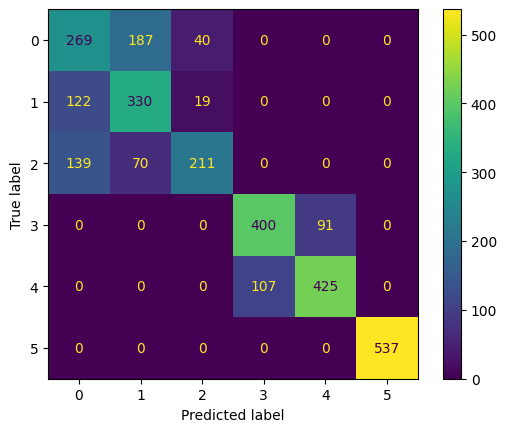

In [41]:
# Definindo o melhor ccp_alpha do GridSearchCV() e Rodando uma nova árvore com esse ccp_alpha.

melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_top3, y_train)


y_pred = clf.predict(X_test_top3)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [43]:
# Erro relativo por classe


erros_relativos = {}
for i in range(cm.shape[0]):
    total = cm[i].sum()
    acertos = cm[i][i]
    erros = total - acertos
    erro_percentual = erros / total
    erros_relativos[i + 1] = erro_percentual  # classes são numeradas de 1 a 6

# Ordenar classes por erro decrescente
erros_ordenados = sorted(erros_relativos.items(), key=lambda x: x[1], reverse=True)

# Mostrar a classe com maior erro
print("Classe com maior erro relativo:", erros_ordenados[0])
print("Erros por classe:")
for classe, erro in erros_ordenados:
    print(f"Classe {classe}: erro de {erro:.2%}")

Classe com maior erro relativo: (3, 0.4976190476190476)
Erros por classe:
Classe 3: erro de 49.76%
Classe 1: erro de 45.77%
Classe 2: erro de 29.94%
Classe 5: erro de 20.11%
Classe 4: erro de 18.53%
Classe 6: erro de 0.00%


In [44]:
#Variável binária: 1 se classe 3, 0 caso contrário
y_train_bin = (y_train == 3).astype(int)
y_test_bin = (y_test == 3).astype(int)


In [45]:

clf_bin = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=2360873)
clf_bin.fit(X_train, y_train_bin)

# Importância das variáveis
importancias_bin = pd.Series(clf_bin.feature_importances_, index=X_train.columns)
top_3_novas = importancias_bin.sort_values(ascending=False).head(3)
print("Top 3 novas variáveis para classe 3:")
print(top_3_novas)

Top 3 novas variáveis para classe 3:
9      0.775057
159    0.051200
504    0.036257
dtype: float64


In [46]:
# Combina variáveis: top 3 globais + top 3 para classe 3
variaveis_finais = var_top3 + top_3_novas.index.tolist()

X_train_final = X_train[variaveis_finais]
X_test_final = X_test[variaveis_finais]

In [47]:
clf_final = DecisionTreeClassifier(min_samples_leaf=20, random_state=2360873)
clf_final.fit(X_train_final, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=2360873)

In [48]:

y_pred_final = clf_final.predict(X_test_final)

from sklearn.metrics import accuracy_score
acc_final = accuracy_score(y_test, y_pred_final)
print(f"Acurácia final com 6 variáveis: {acc_final:.4f}")

Acurácia final com 6 variáveis: 0.7648


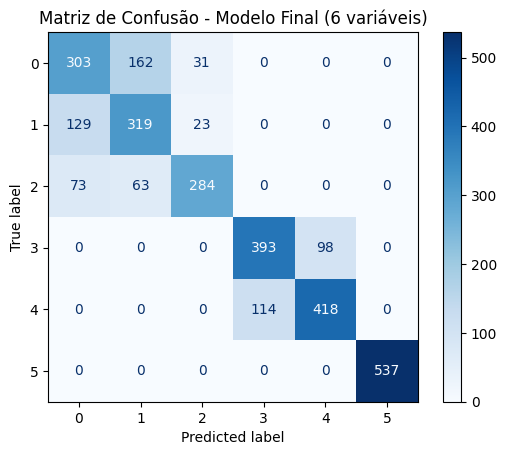

In [49]:

# Matriz de confusão
cm_final = confusion_matrix(y_test, y_pred_final)

# Exibição gráfica
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final)
disp_final.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Modelo Final (6 variáveis)")
plt.show()